<a href="https://colab.research.google.com/github/Ayush-Kori/Quant-Dev-/blob/main/Cointegration_versus_Correlation_properties_bw_KO_and_PEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from statsmodels.tsa.stattools import coint
from statsmodels.api import OLS
from scipy.stats import pearsonr

In [7]:
df1=pd.read_excel('KO.xls')
df2=pd.read_excel('PEP.xls')
df=pd.merge(df1, df2, on='Date', suffixes=('_KO', '_PEP'))
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

Run cointegration (Engle-Granger) test

In [8]:
coint_t, pvalue, crit_value=coint(df['Adj Close_KO'], df['Adj Close_PEP'])
(coint_t, pvalue, crit_value) # abs(t-stat) < critical
#value at 90%. pvalue says probability of null
#hypothesis (of no cointegration) is 73%

(np.float64(-1.5815517041517164),
 np.float64(0.7286134576473533),
 array([-3.89783854, -3.33691006, -3.04499143]))

Determine hedge ratio

In [9]:
model=OLS(df['Adj Close_KO'], df['Adj Close_PEP'])
results=model.fit()
hedgeRatio=results.params
hedgeRatio

,0
Adj Close_PEP,1.011409


Spread = KO -hedgeRatio*PEP

/tmp/ipython-input-1213369034.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread=df['Adj Close_KO']-hedgeRatio[0]*df['Adj Close_PEP']


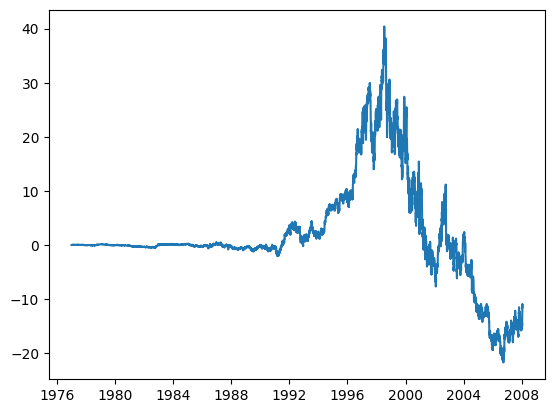

In [10]:
spread=df['Adj Close_KO']-hedgeRatio[0]*df['Adj Close_PEP']
plt.plot(spread) # Figure 7.2

Corelation test

In [16]:
dailyret=df.loc[:, ('Adj Close_KO', 'Adj Close_PEP')].pct_change()
dailyret.corr()

,Adj Close_KO,Adj Close_PEP
Adj Close_KO,1.000000,0.484924
Adj Close_PEP,0.484924,1.000000


In [18]:
dailyret_clean=dailyret.dropna()
dailyret_clean.corr()
pearsonr(dailyret_clean.iloc[:,0], dailyret_clean.iloc[:,1]) #first output is correlation coefficient,
# second utput ivalue

PearsonRResult(statistic=np.float64(0.484923943937057), pvalue=np.float64(0.0))